In [21]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

In [22]:
FACE = list(range(17, 68))
FACE_COMPLET = list(range(0, 68))
LIPS = list(range(48, 61))
EYEBROW_RIGHT = list(range(17, 22))
EYEBROW_LEFT = list(range(22, 27))
EYE_RIGHT = list(range(36,42))
EYE_LEFT = list(range(42,48))
NOSE = list(range(27,35))
JAW = list(range(0,17))

In [23]:
class_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
class_dlib_68 = dlib.shape_predictor(class_dlib_68_path)
detect_face = dlib.get_frontal_face_detector()

In [24]:
def aspect_of_eye(points_eye):
    a = dist.euclidean(points_eye[1], points_eye[5])
    b = dist.euclidean(points_eye[2], points_eye[4])
    c = dist.euclidean(points_eye[0], points_eye[3])
    return (a + b) / (2.0 * c)

convertxhull = lambda img: cv2.convexHull(img)
drawcontours = lambda img, color, points: cv2.drawContours(img, [points], 0, color, 3)

def set_anothention_marcos_casca_convexa(img, marcos):
    rectangles = detect_face(img)
    
    for i, _ in enumerate(rectangles):
        marco = marcos[i]
        
        points = convertxhull(marco[EYE_RIGHT])
        drawcontours(img, (0, 0, 255), points)

        points = convertxhull(marco[EYE_LEFT])
        drawcontours(img, (0, 0, 255), points)
    return img

def set_rectangle(img, color=(0, 255, 0)):
    detect_other_faces = 1
    faces = detect_face(img, detect_other_faces)
    for face in faces:
        x, y, l, a = (int(face.left()), int(face.top()), int(face.right()), int(face.bottom()))
        cv2.rectangle(img, (x, y), (l, a), color, 2)
        print(f'Detect face: {x, y, l, a}')
    return img

def get_face_marco(img):
    detect_other_faces = 1
    rectangles = detect_face(img, detect_other_faces)
    marcos = []
    for rectangle in rectangles:
        marcos.append(np.matrix([
            [p.x, p.y] for p in class_dlib_68(img, rectangle).parts()
        ]))
    return marcos

def set_anothers_points(img, marcos, color=(0, 255, 0)):
    for marco in marcos:
        for idx, point in enumerate(marco):
            pos = (point[0, 0], point[0, 1])
            cv2.circle(img, pos, 3, color, -1)
            cv2.putText(img, str(idx), pos, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

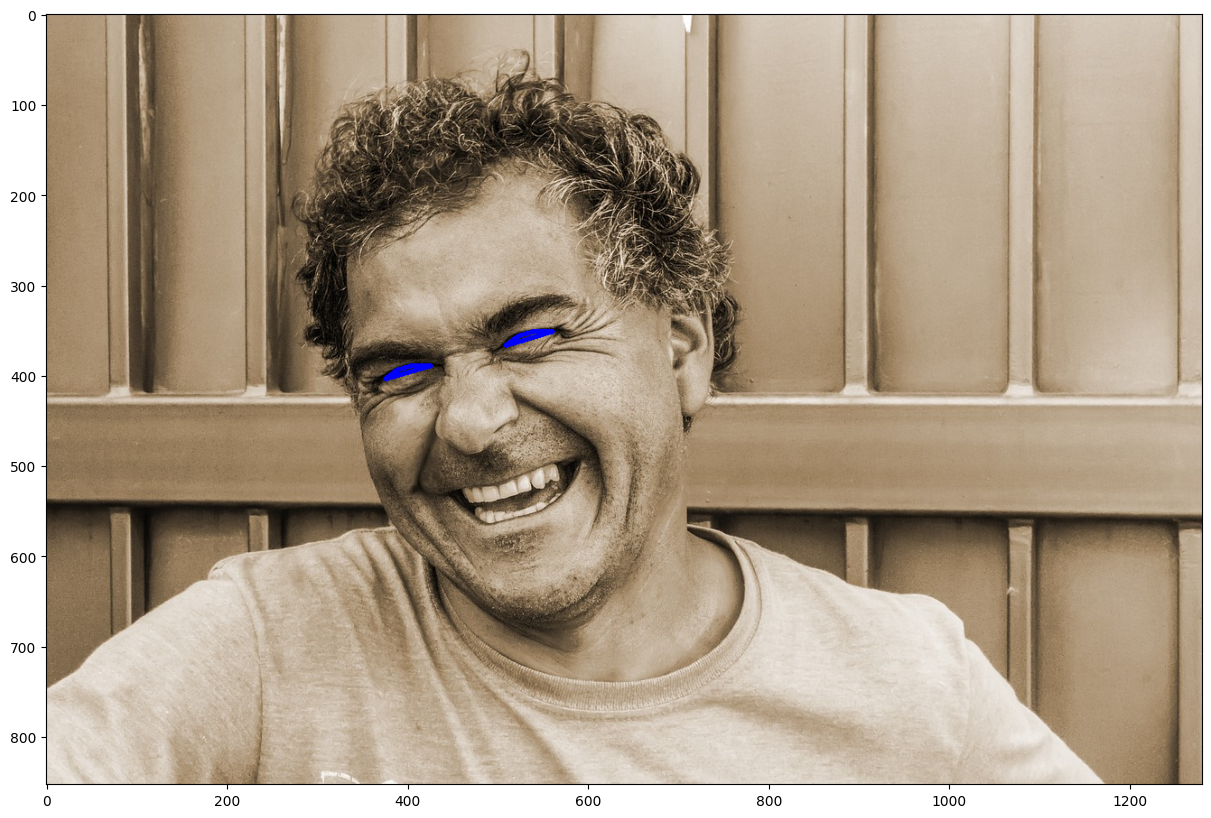

In [25]:
img = cv2.imread("imagens/px-man-happy.jpg")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

anothed_img = set_anothention_marcos_casca_convexa(img_color.copy(), get_face_marco(img_color.copy()), )
plt.figure(figsize=(20, 10))
plt.imshow(anothed_img)

In [26]:
valeu_aspect_eye_left = aspect_of_eye(anothed_img[0][EYE_LEFT])
value_aspect_eye_right = aspect_of_eye(anothed_img[0][EYE_RIGHT])
valeu_aspect_eye_left, value_aspect_eye_right

(129.0, 1.5000000000000002)

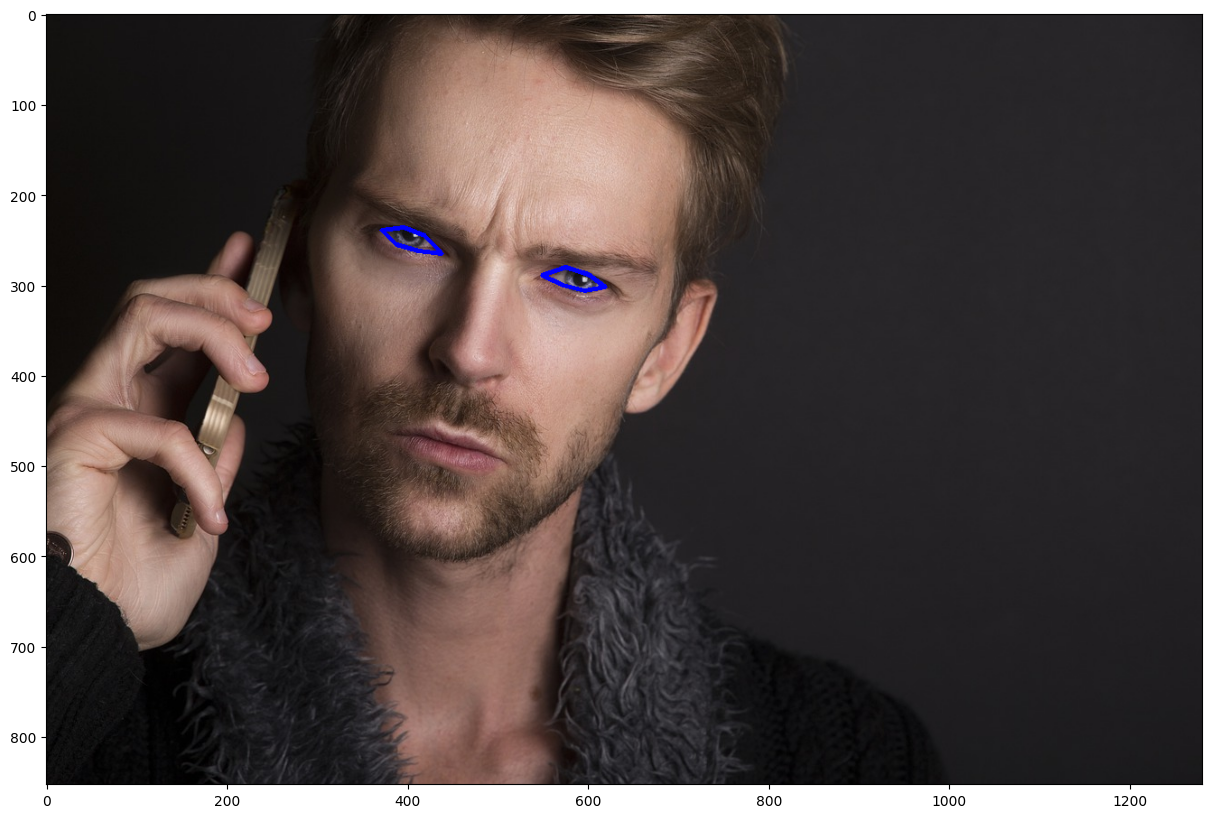

In [27]:
img = cv2.imread("imagens/px-man-serious.jpg")
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

anothed_img = set_anothention_marcos_casca_convexa(img_color.copy(), get_face_marco(img_color.copy()), )
plt.figure(figsize=(20, 10))
plt.imshow(anothed_img)

In [28]:
valeu_aspect_eye_left = aspect_of_eye(anothed_img[0][EYE_LEFT])
value_aspect_eye_right = aspect_of_eye(anothed_img[0][EYE_RIGHT])
valeu_aspect_eye_left, value_aspect_eye_right

/tmp/ipykernel_697995/3688628645.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (a + b) / (2.0 * c)


(inf, inf)

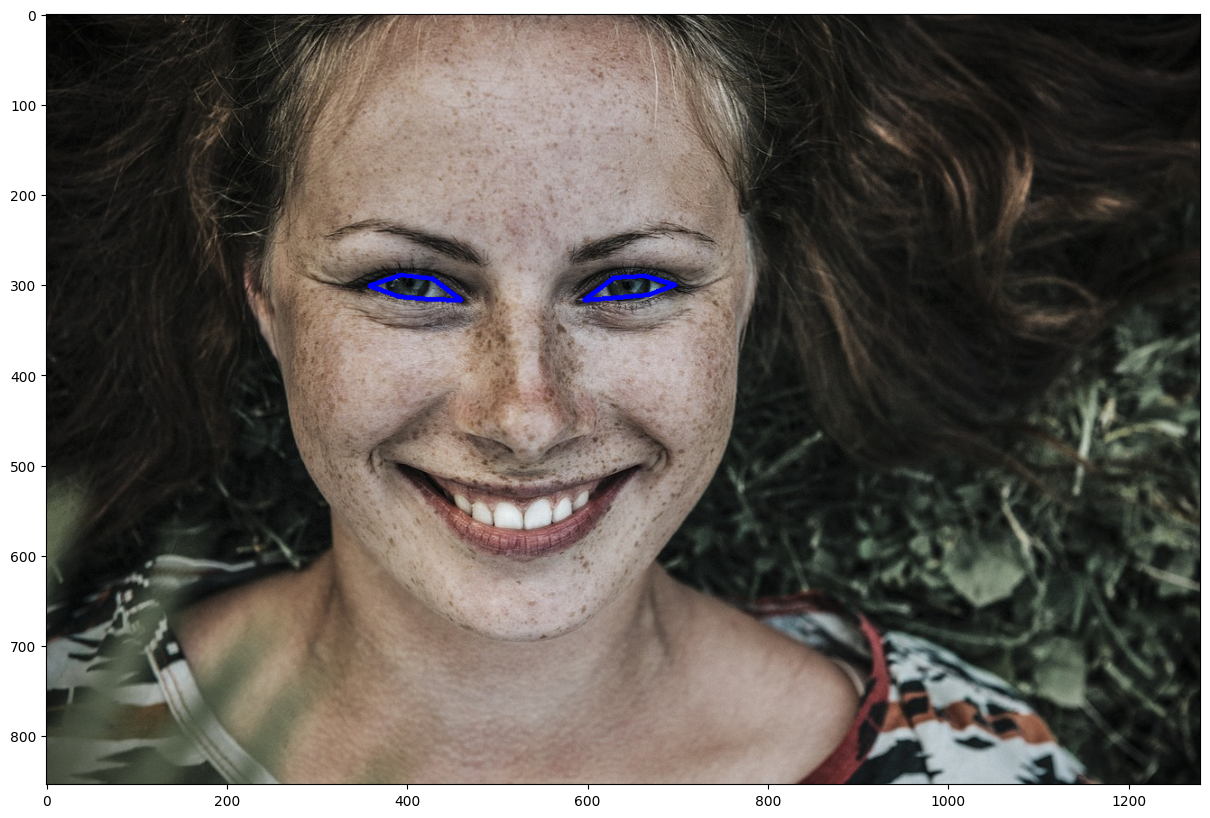

In [29]:
img = cv2.imread("imagens/px-woman-smilings.jpg")

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
another_img = set_anothention_marcos_casca_convexa(img_color.copy(), get_face_marco(img_color))

plt.figure(figsize=(20, 10))
plt.imshow(another_img)

In [30]:
valeu_aspect_eye_left = aspect_of_eye(anothed_img[0][EYE_LEFT])
value_aspect_eye_right = aspect_of_eye(anothed_img[0][EYE_RIGHT])
valeu_aspect_eye_left, value_aspect_eye_right

/tmp/ipykernel_697995/3688628645.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (a + b) / (2.0 * c)


(inf, inf)